#### 오차제곱합 실습
##### 오차제곱합의 수식의 결과값이 낮을 수록 정답에 가까울 확률이 높다는 것을 의미한다

In [9]:
import numpy as np

## y = 소프트맥스 함수의 출력값
y = [ 0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0 ] # 정답이 2일 확률이 60%를 표현

## t = 원-핫 인코딩 표기법: 하나의 원소만 1이고 나머지는 0으로 나타내는 표기법
t = [ 0, 0, 1, 0, 0, 0, 0, 0, 0, 0 ] # 1원소가 2번 인덱스 이므로 정답이 2인것을 표현

def sum_squares_error (y, t):
    n = len(y)
    sum = 0

    for i in range(n):
        sum += np.sum( (y[i] - t[i]) ** 2 )

    return sum / n

sum_squares_error(np.array(y), np.array(t)) # -> 0.09750000000000003

y = [ 0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0 ] # 정답이 7일 확률이 60%를 표현
sum_squares_error(np.array(y), np.array(t)) # -> 0.5975

##### N개의 훈련 데이터를 오차제곱합의 수식 ######

0.5975

#### 교차 엔트로피 오차 실습
##### 오차제곰합과 마찬가지로 결과값이 작을수록 정답일 확률이 높아진다는 의미
##### 수식에는 없는 델타값은 더한 이유: np.log() 함수에 0을 입력하면 -inf(음의 무한대)가 되어 계산이 불가능해지기 때문에 아주 작은 값을 더해 음의 무한대 값을 피한다

In [10]:
def cross_entropy_error(y, t):
    n = len(y)
    sum = 0
    delta = 1e-7

    for i in range(n):
        sum += -np.sum( ( t * np.log(y + delta) ) )

    return sum / n

y = [ 0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0 ]
t = [ 0, 0, 1, 0, 0, 0, 0, 0, 0, 0 ]
cross_entropy_error(np.array(y), np.array(t)) ## -> 0.510825457099338

y = [ 0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0 ]
cross_entropy_error(np.array(y), np.array(t)) ## -> 2.302584092994546

2.302584092994546

#### 해석적 미분

In [29]:
def numerical_diff(f, x):
    h = 1e-4
    m = (f(x + h) - f(x - h)) /(2 * h)

    return m

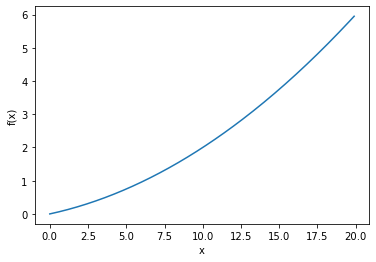

0.1999999999990898
0.2999999999986347


In [31]:
import numpy as np
import matplotlib.pylab as plt

def func_1(x):
    return 0.01 * x ** 2 + 0.1 * x

x = np.arange(0.0, 20.0, 0.1)
y = func_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

## retrun: x에 대한 f(x)의 변화량 -> 해석적 미분의 실제 기울기 값
print(numerical_diff(func_1, 5))

## return: x에 대한 f(x)의 변화량 -> 해석적 미분의 실제 기울기 값
print(numerical_diff(func_1, 10))

#### 편미분 실습

In [46]:
def func_2(x):
    return np.sum(x ** 2)

def func_tmp1(x0):
    return x0 * x0 + 4.0 ** 2.00


def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)

        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val

    return grad


print(numerical_gradient(func_2, np.array([ 3.0, 4.0 ])))

print(numerical_gradient(func_2, np.array([ 0.0, 2.0 ])))

print(numerical_gradient(func_2, np.array([ 3.0, 0.0 ])))

[6. 8.]
[0. 4.]
[6. 0.]


/var/folders/yf/mmrj8c9d2zbfn3w8crhhf0_r0000gn/T/ipykernel_74761/1882188358.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


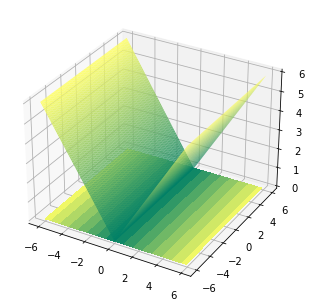

In [43]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = Axes3D(fig)

X = np.arange(-6, 6, 0.1)
Y = np.arange(-6, 6, 0.1)

X, Y = np.meshgrid(X, Y)

Z = np.sqrt(X ** 2, Y ** 2)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='summer')
ax.contourf(X, Y, Z, zdir='z', offset=0, cmap=plt.cm.summer)

plt.show()